<p style="font-family: Cambria; text-align: center; font-size: 48px;"> II. Descriptive Analysis</h1>

In [1]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#Reading the cleaned data 
data=pd.read_csv("covid_python_Dec25.csv",dtype={0: str})

In [3]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

###### <b style="font-family: Cambria; font-size: 16px;"><i>1. What is the percentage of covid positive cases among the survey respondents ?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Analyzing the percentage of COVID-positive cases among survey respondents helps understand the prevalence of infection in the population and provides a baseline for comparing subgroups and informing public health interventions.</i><b>


In [4]:
# Count positive cases
positive_count = df['covid_positive'].eq('positively').sum()

# Count respondents who actually reported a result (exclude 'NR')
tested_respondents = df['covid_positive'].isin(['negatively', 'n', 'positively']).sum()

# Calculate percentage
positive_percentage = (positive_count / tested_respondents) * 100

print("Number of Covid-positive cases:", positive_count)
print(f"Percentage of Covid-positive cases: {positive_percentage:.2f}%")

Number of Covid-positive cases: 22
Percentage of Covid-positive cases: 4.49%


###### <b style="font-family: Cambria; font-size: 16px;"><i>2. What is the distribution of covid positive cases by sex across the survey respondents ?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Analyzing the distribution of COVID-positive cases by sex helps identify potential differences in infection rates between males and females, informing targeted public health strategies.</i><b>


In [5]:
df.assign(
    sex=df['sex'].map({'m': 'Male', 'f': 'Female', 'NR': 'Not Reported'}),
    covid_status=df['covid_positive'].replace({
        'positively': 'Positive',
        'negatively': 'Negative',
        'NR': 'Not Reported'
    })
).groupby(['sex', 'covid_status']).size().unstack(fill_value=0)

covid_status,Negative,Not Reported,Positive
sex,,,
Female,231,13013,10
Male,87,9714,8
Not Reported,150,270888,4


###### <b style="font-family: Cambria; font-size: 16px;"><i>3. Which geographic areas (FSA) submitted the most responses ?</i><b>
<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:  This helps identify regions with the highest engagement and highlights areas that may be overrepresented or underrepresented. Understanding geographic response patterns supports targeted outreach and regional analysis.</i><b>


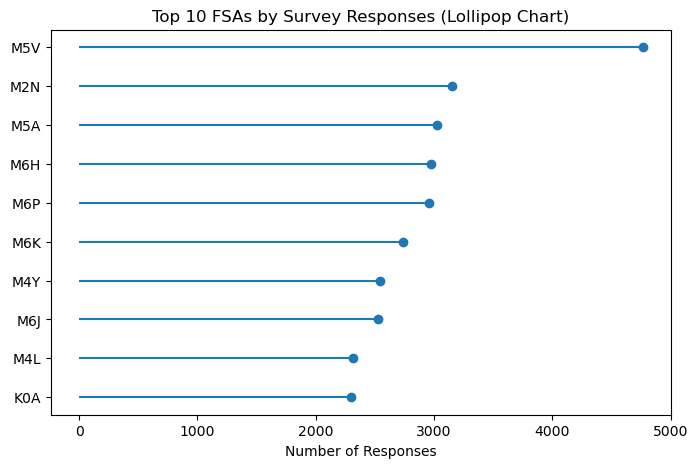

In [6]:
top_fsa = df['fsa'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.hlines(
    y=top_fsa.index,
    xmin=0,
    xmax=top_fsa.values
)
plt.plot(top_fsa.values, top_fsa.index, "o")

plt.xlabel("Number of Responses")
plt.title("Top 10 FSAs by Survey Responses (Lollipop Chart)")
plt.gca().invert_yaxis()
plt.show()


###### <b style="font-family: Cambria; font-size: 16px;"><i>4. Which age groups should be prioritized for vaccination campaigns?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Older adults have a higher risk of severe COVID outcomes. Identifying age groups with higher positivity can help allocate vaccines effectively.</i><b>

In [7]:
# Crosstab of age category vs COVID positive
age_covid = pd.crosstab(df['age_category'], df['covid_positive'], normalize='index')*100
age_covid



covid_positive,NR,negatively,positively
age_category,,,
26-44,98.494125,1.423134,0.082740
45-64,98.317900,1.614136,0.067964
<26,98.516229,1.360124,0.123648
>65,98.162418,1.837582,0.000000
NR,100.000000,0.000000,0.000000


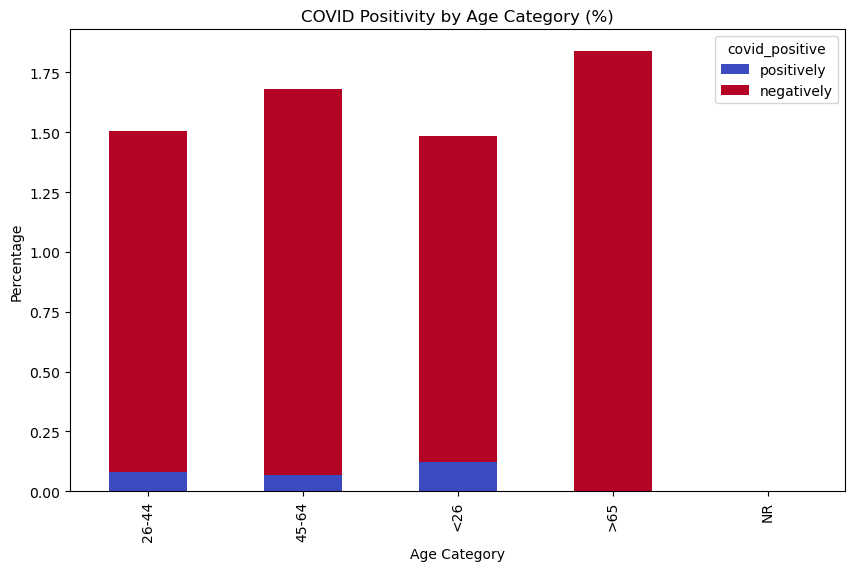

In [8]:
age_covid[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("COVID Positivity by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()

##### <b style="font-family: Cambria; font-size: 16px;"><i>5. Does tobacco usage affect COVID symptom severity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Tobacco users may have compromised respiratory systems, potentially worsening COVID symptoms. Analyzing symptom frequency among smokers versus non-smokers can help prioritize care for vulnerable populations.</i><b>


C:\Users\vukch\AppData\Local\Temp\ipykernel_50760\2739462327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_cases['tobacco_usage_clean'] = positive_cases['tobacco_usage'].str.lower().replace({


<Figure size 1000x600 with 0 Axes>

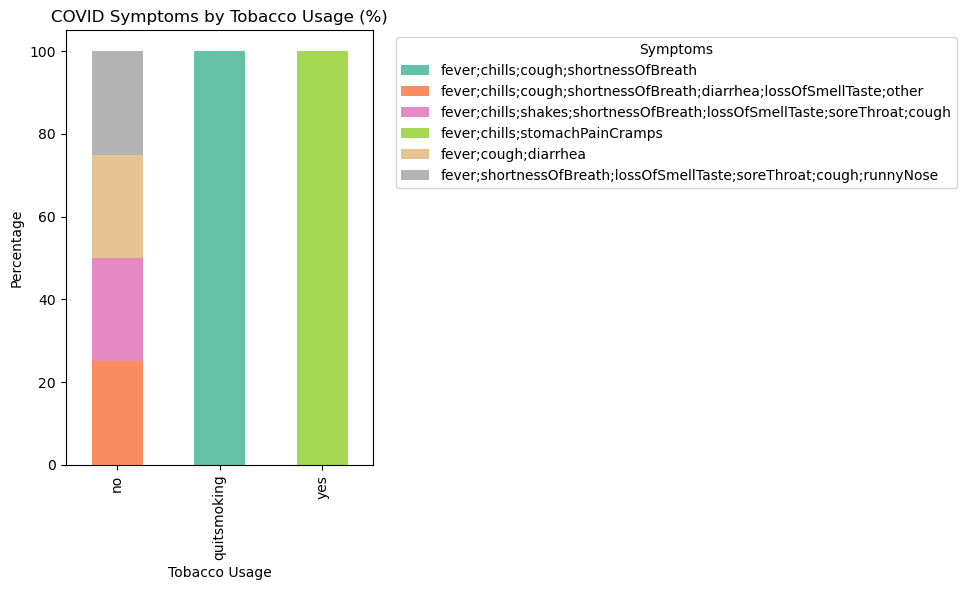

In [9]:
# Remove NR from tobacco usage and symptoms
df_clean = df[
    (df['tobacco_usage'].notna()) &
    (df['tobacco_usage'].str.lower() != 'nr') &
    (df['symptoms'].notna()) &
    (df['symptoms'].str.lower() != 'nr')
].copy()

# Filter only positive cases
positive_cases = df_clean[df_clean['covid_positive'].astype(str).str.lower() == 'positively']

# Optional: simplify tobacco categories (e.g., yes/no)
positive_cases['tobacco_usage_clean'] = positive_cases['tobacco_usage'].str.lower().replace({
    'y': 'yes',
    'yes': 'yes',
    'n': 'no',
    'no': 'no'
})

# Optional: limit to top 6 most common symptoms to avoid over‑dense chart
top_symptoms = (
    positive_cases['symptoms']
    .value_counts()
    .head(6)
    .index
)

positive_cases = positive_cases[positive_cases['symptoms'].isin(top_symptoms)]

# Crosstab
tobacco_symptoms = pd.crosstab(
    positive_cases['tobacco_usage_clean'],
    positive_cases['symptoms'],
    normalize='index'
) * 100

# Plot
plt.figure(figsize=(10,6))
tobacco_symptoms.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set2'
)

plt.title("COVID Symptoms by Tobacco Usage (%)")
plt.ylabel("Percentage")
plt.xlabel("Tobacco Usage")
plt.legend(title="Symptoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 18px;"> <i>
  <strong><br>6. How common were pre-existing medical conditions ?<br></strong>
    <p style="font-family: Cambria; font-size: 16px;">
 <b <strong>Reasoning:<br></strong>
 Pre-existing medical conditions increase the risk of complications and often contribute to vulnerability classification. 
  Understanding their prevalence helps explain risk patterns and supports targeted intervention strategies.
</p> </b>

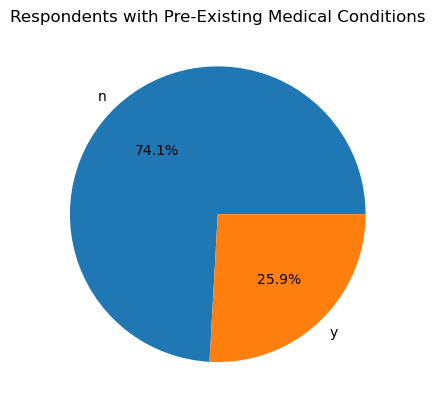

In [10]:
df['any_medical_conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Respondents with Pre-Existing Medical Conditions")
plt.ylabel("")
plt.show()

<b style="font-family: Cambria; font-size: 16px;"><i>7. Which age groups should receive early mental health support based on pandemic impact?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Younger adults (18–34) often report higher stress and mental health impact. Early counseling and digital support can prevent long-term psychological issues.</i><b>

In [11]:
mental_age = pd.crosstab(df['age_category'], df['mental_health_impact'], normalize='index')*100
mental_age_plot = mental_age[['negatively','positively']]
mental_age_plot


mental_health_impact,negatively,positively
age_category,,
26-44,12.948866,0.992884
45-64,15.028460,1.189364
<26,17.867079,1.143740
>65,14.967398,1.511559
NR,0.000000,0.000000


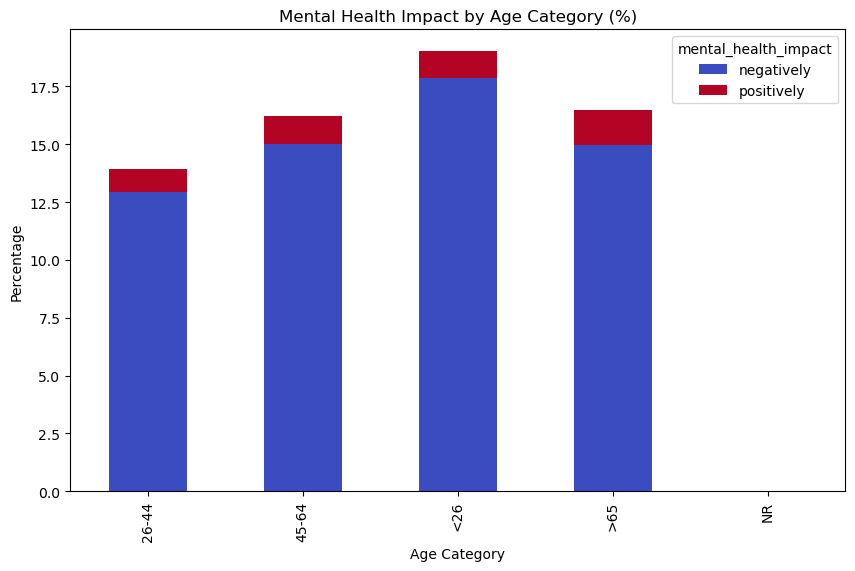

In [12]:
mental_age_plot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Mental Health Impact by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><i>8. Which working populations should be prioritized for workplace interventions to reduce exposure?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Employees working outside the home are at higher exposure risk. Early workplace testing, mask use, and flexible schedules reduce transmission.</i><b>

In [13]:
work_positive = pd.crosstab(df['travel_work_school'], df['covid_positive'], normalize='index')*100
work_positive[['positively','negatively']]


covid_positive,positively,negatively
travel_work_school,,
Always Work From Home,0.345423,3.799655
Did Not Travel Before,0.126529,3.795867
Not Reported,0.001401,0.052203
Still Travel (Essential),0.216920,7.809111
Still Travel (Non-Essential),0.505051,3.535354
Stopped Traveling,0.216920,2.776573


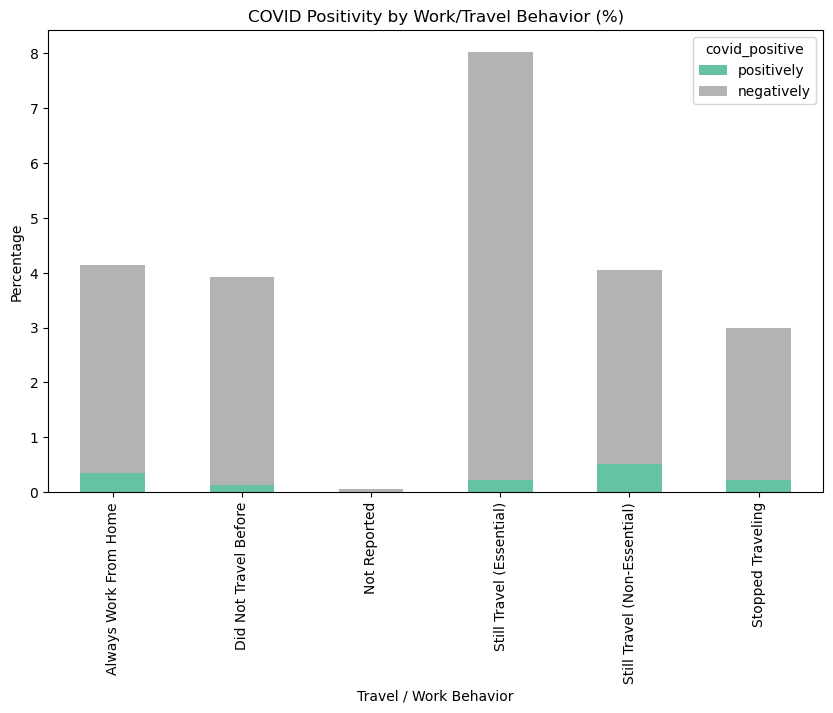

In [14]:
work_positive[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("COVID Positivity by Work/Travel Behavior (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel / Work Behavior")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><i>9. How many respondents are self-isolating?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Self-isolation is critical to reduce transmission. Knowing how many people are following isolation guidelines provides insight into behavior compliance.</i><b>

In [15]:
# Self-isolation counts
self_isolate_counts = df['self_isolating'].value_counts()
self_isolate_counts


self_isolating
NR    285426
y       6872
n       1807
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>10. What is the average symptom severity among respondents with and without medical conditions?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
People with underlying health conditions may experience more severe symptoms. By comparing average symptom scores between groups, we can identify higher-risk populations</i><b>

In [16]:
symptom_cols = ['fever_chills_shakes','cough','shortness_of_breath']
df['symptom_score'] = df[symptom_cols].apply(lambda x: x.map({'y':1,'n':0,'NR':0})).sum(axis=1)

avg_symptoms = df.groupby('any_medical_conditions')['symptom_score'].mean()
print(avg_symptoms)


any_medical_conditions
n    0.060401
y    0.098878
Name: symptom_score, dtype: float64


<b style="font-family: Cambria; font-size: 16px;"><i>11. What is the age distribution of respondents?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Age is a key demographic factor that may affect COVID outcomes.</i><b>

In [17]:
# Age distribution
age_counts = df['age_category'].value_counts()
age_counts


age_category
NR       263639
26-44     12086
45-64     11771
>65        3374
<26        3235
Name: count, dtype: int64